In [9]:
# Import packages.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
# Load the .mat file.
mat_contents=sio.loadmat('./singlerun_softHebbian_ee_distributions.mat')

In [10]:
c = mat_contents['c'].squeeze()
Cee_distribution = mat_contents['Cee_distribution']
Cei_distribution = mat_contents['Cei_distribution']
Cii_distribution = mat_contents['Cii_distribution']
dt = mat_contents['dt'].squeeze()
dtRate = mat_contents['dtRate'].squeeze()
eRateT = mat_contents['eRateT'].squeeze()
iRateT = mat_contents['iRateT'].squeeze()
eta_ee_soft = mat_contents['eta_ee_soft'].squeeze()
Ie_current = mat_contents['IeRec'].squeeze()
Ii_current = mat_contents['IiRec'].squeeze()
Ix_current = mat_contents['IxRec'].squeeze()
Jm = mat_contents['Jm']
Jmax_ee_soft = mat_contents['Jmax_ee_soft'].squeeze() # =30?
Jxm = mat_contents['Jxm']
JRec_ee = mat_contents['JRec_ee']
mean_J_ee = np.mean(JRec_ee,axis=0)
mC = mat_contents['mC']
mR = mat_contents['mR']
mV = mat_contents['mV']
N = mat_contents['N'].squeeze()
Ree_distribution = mat_contents['Ree_distribution']
Rei_distribution = mat_contents['Rei_distribution']
Rii_distribution = mat_contents['Rii_distribution']
reSim = mat_contents['reSim']
riSim = mat_contents['riSim']
rx = mat_contents['rx'].squeeze()
seed = mat_contents['seed'].squeeze()
spikeIndex_E = mat_contents['spikeIndex_E'].squeeze()
spikeTimes_E = mat_contents['spikeTimes_E'].squeeze()
spikeIndex_I = mat_contents['spikeIndex_I'].squeeze()
spikeTimes_I = mat_contents['spikeTimes_I'].squeeze()
T = mat_contents['T'].squeeze()
T1 = mat_contents['T1'].squeeze()
T2 = mat_contents['T2'].squeeze()
tauSTDP = mat_contents['tauSTDP'].squeeze()
Tburn = mat_contents['Tburn'].squeeze()
Tburn_raster = mat_contents['Tburn_raster'].squeeze()
Var_e_distribution = mat_contents['Var_e_distribution']
Var_i_distribution = mat_contents['Var_i_distribution']
W = mat_contents['W']
winsize = mat_contents['winsize'].squeeze()
Wx = mat_contents['Wx']
time_axis = np.linspace(0,T/1000,len(JRec_ee[0,:]))

In [11]:
print(eta_ee_soft)

0.005


In [143]:
# We want distributions of rates, covs, vars, corrs, weights.

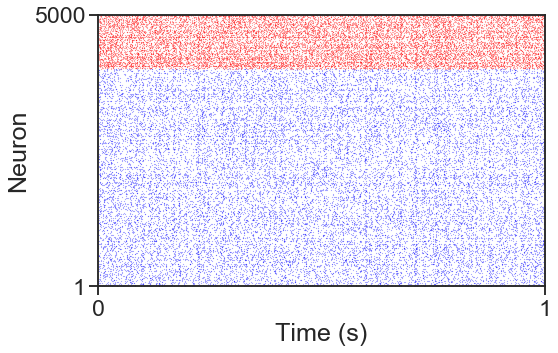

In [144]:
# Raster.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

# indxs =  np.argsort(spikeTimes_E)
# spikeTimes_E = spikeTimes_E[indxs]
# spikeIndex_E = spikeIndex_E[indxs]

plt.plot((spikeTimes_E-Tburn_raster)/1000,spikeIndex_E, '.', color='blue', markersize=.25)
plt.plot((spikeTimes_I-Tburn_raster)/1000,spikeIndex_I, '.', color='red', markersize=.25)

plt.xlabel('Time (s)')
plt.ylabel('Neuron')

plt.xlim((0,(T-Tburn_raster)/1000))
plt.xlim((0,1))
plt.ylim((0,N))

plt.xticks((0,1))
plt.yticks((1,N))

plt.show()

fig.savefig("./PlotsReview_BNs/raster_ee_softHebbian.pdf", bbox_inches="tight")



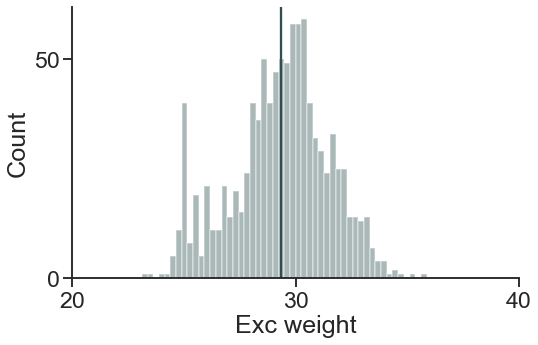

In [145]:
# Distribution of weights.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

sns.distplot(JRec_ee[:,-1]*np.sqrt(N),kde=False, color='darkslategray', bins=50)

plt.axvline(np.mean(JRec_ee[:,-1]*np.sqrt(N)), color='darkslategray')

plt.xlabel('Exc weight')
plt.ylabel('Count')

plt.xlim((20,40))

plt.xticks((20,30,40))
plt.yticks((0,50))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/weight_dist_ee_softHebbian.pdf", bbox_inches="tight")


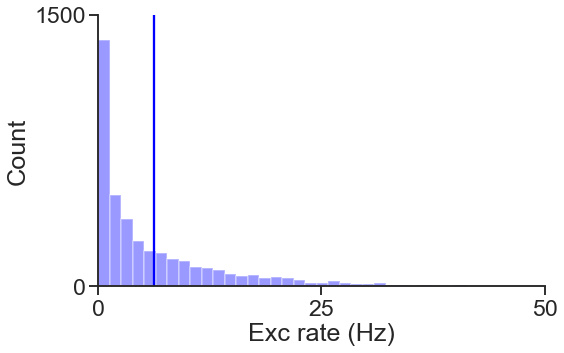

In [146]:
# Distribution of rates.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

sns.distplot(reSim*1000,kde=False,color='blue', bins=50)
# sns.distplot(riSim*1000,kde=False, color='red')

plt.axvline(np.mean(1000*reSim),color='blue')

plt.xlabel('Exc rate (Hz)')
plt.ylabel('Count')

plt.xlim((0,50))

plt.xticks((0,25,50))
plt.yticks((0,1500))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/eRates_dist_ee_softHebbian.pdf", bbox_inches="tight")


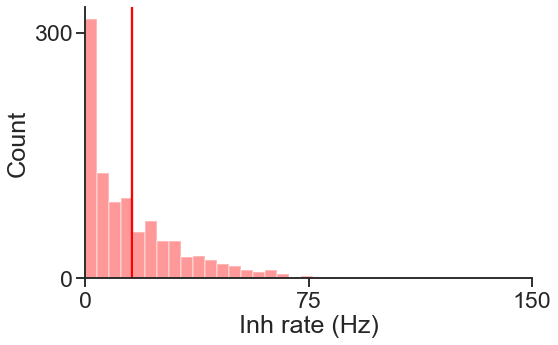

In [147]:
# Distribution of rates.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

# sns.distplot(reSim*1000,kde=False)
sns.distplot(riSim*1000,kde=False, color='red')

plt.axvline(np.mean(1000*riSim),color='red')

plt.xlabel('Inh rate (Hz)')
plt.ylabel('Count')

plt.xlim((0,150))
plt.xticks((0,75,150))
plt.yticks((0,300))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/iRates_dist_ee_softHebbian.pdf", bbox_inches="tight")


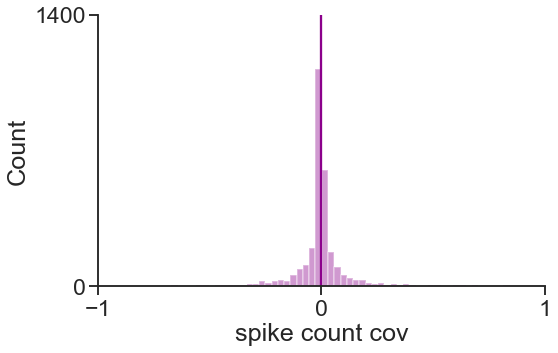

In [148]:
# Distribution of covs.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

sns.distplot([Cee_distribution,Cei_distribution,Cii_distribution],
             kde=False,bins=100,color='darkmagenta')

plt.axvline(np.nanmean([Cee_distribution,Cei_distribution,Cii_distribution]),
            color='darkmagenta')

plt.xlabel('spike count cov')
plt.ylabel('Count')

plt.xlim((-1,1))

plt.xticks((-1,0,1))
plt.yticks((0,1400))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/covs_dist_ee_softHebbian.pdf", bbox_inches="tight")


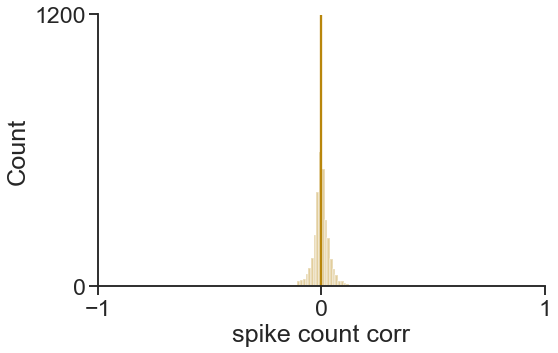

In [149]:
# Distribution of corrs.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

sns.distplot([Ree_distribution,Rei_distribution,Rii_distribution],
             kde=False,bins=40,color='darkgoldenrod')

plt.axvline(np.nanmean([Ree_distribution,Rei_distribution,Rii_distribution]),
            color='darkgoldenrod')

plt.xlabel('spike count corr')
plt.ylabel('Count')

plt.xlim((-0.5,0.5))

plt.xticks((-1,0,1))
plt.yticks((0,1200))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/corrs_dist_ee_softHebbian.pdf", bbox_inches="tight")


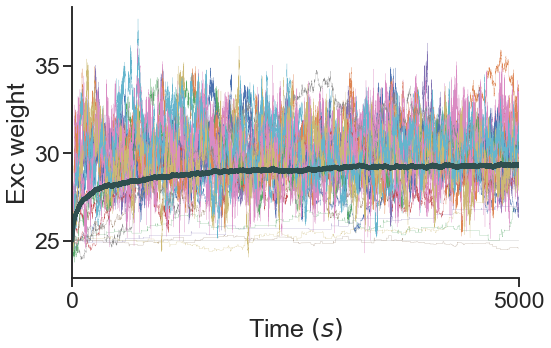

In [8]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":.2})

for i in range(20):
    plt.plot(time_axis,JRec_ee[i,:]*np.sqrt(N),)
# i=0
# plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))

plt.plot(time_axis,mean_J_ee*np.sqrt(N), color='darkslategray',linewidth=4)

# plt.axhline(y=Jmax_ee_soft*np.sqrt(N),color='darkslategray',linewidth=4,linestyle='--')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Exc weight')

plt.xlim((0,T/1000/1))
# plt.ylim((24,31))

plt.xticks((0,T/1000/1))
# plt.yticks((25,30))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig5-distributions-hebb/weight_evolution_ee_softHebbian.pdf", bbox_inches="tight")


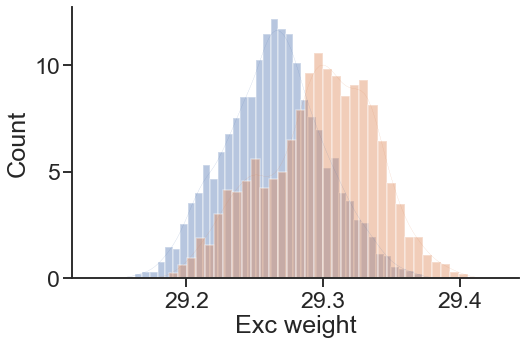

In [15]:
# Check for stationarity of the time series
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":.1})


# Starting at i, what's the distribution of the time series?
i1 = 8*len(mean_J_ee)//10
i2 = 9*len(mean_J_ee)//10
sns.distplot(mean_J_ee[i1:i2]*np.sqrt(N))
j1 = 9*len(mean_J_ee)//10
j2 = 10*len(mean_J_ee)//10
sns.distplot(mean_J_ee[j1:j2]*np.sqrt(N))

# plt.axvline(x=Jmax_ee_soft*np.sqrt(N),color='darkslategray',linewidth=4,linestyle='--')

# Should it be normal or just symmetric?

plt.ylabel(r'Count')
plt.xlabel(r'Exc weight')

# plt.xlim((0,T/1000))
# plt.ylim((0,4))

# plt.xticks((0,T/1000))
# plt.yticks((0,5,10,15))

sns.despine()
plt.show()

# fig.savefig("./PlotsReview_BNs/weight_evolution_ee_kohonen.pdf", bbox_inches="tight")




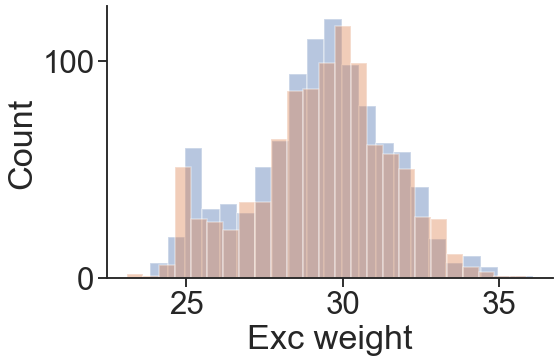

In [22]:
# Check for stationarity of the time series
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.1})


# Starting at i, what's the distribution of the time series?
sns.distplot(JRec_ee[:,40000]*np.sqrt(N),kde=False)

sns.distplot(JRec_ee[:,-1]*np.sqrt(N),kde=False)

# plt.axvline(x=Jmax_ee_soft*np.sqrt(N),color='darkslategray',linewidth=4,linestyle='--')

# Should it be normal or just symmetric?

plt.ylabel(r'Count')
plt.xlabel(r'Exc weight')

# plt.xlim((0,T/1000))
# plt.xlim((0,4))

plt.yticks((0,100))
plt.xticks((25,30,35))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/weight_distribution_kstest_ee_softhebbian.pdf", bbox_inches="tight")


In [19]:
from scipy import stats
stats.ks_2samp(JRec_ee[:,40000]*np.sqrt(N),JRec_ee[:,-1]*np.sqrt(N))

Ks_2sampResult(statistic=0.045, pvalue=0.26347172719864703)

Since the p-value is greater than 0.05, we retain the null hypothesis.

0.0
0.2
0.4
0.6
0.8


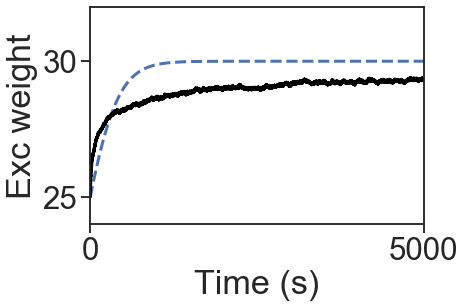

In [28]:
## Symbolic computation of the theoretical fixed point of the system for a set of different initial conditions.

pex = 0.1; qx = 0.2;  qi = 0.2; qe = 0.8; pix = 0.1;
pee = 0.1; pei = 0.1; pie = 0.1; pii = 0.1; jex = 180;
jix = 135; jei = -100; jie = 112.5; jii = -250; jee=25;
taux = 10; taue = 8; taui = 4; tauc = 5; rx = 10/1000; tauSTDP = 200;
wex = pex*qx*jex
wee = pee*qe*jee 
wix = pex*qi*jix 
wei = pei*qi*jei 
wie = pie*qe*jie 
wii = pii*qi*jii

W = np.array(([wee, wei], [wie, wii])).reshape((2,2))
Wx = np.array([wex, wix]).reshape((2,1))

Jmax=30

time = 500000 # T/dt
j_ee = np.zeros((time,1))
j_ee[0,0] = 25

for t in range(time-1):
    wee = pee*qe*j_ee[t,0]
    W = np.array(([wee, wei], [wie, wii])).reshape((2,2))
    r = - np.linalg.inv(W) @ (Wx * rx)
    r_e = r[0,0]
    r_i = r[1,0]
    dj_ee = eta_ee_soft * (Jmax * tauSTDP * r_e**2 - j_ee[t] * tauSTDP * r_e**2 )
    j_ee[t+1] = j_ee[t] + 0.1 * dj_ee
    if(t % (time/5) == 0):
        print(t/time)

plt.plot(np.linspace(0,5000,len(j_ee)),j_ee,linewidth=3, linestyle='--')

plt.plot(np.linspace(0,5000,len(mean_J_ee)),mean_J_ee*np.sqrt(N),color='black',linewidth=3,label='mean')

plt.ylim(24,32)
plt.xlim(-10,5010)

plt.xticks((0,5000))

plt.xlabel('Time (s)')
plt.ylabel('Exc weight')


plt.show()

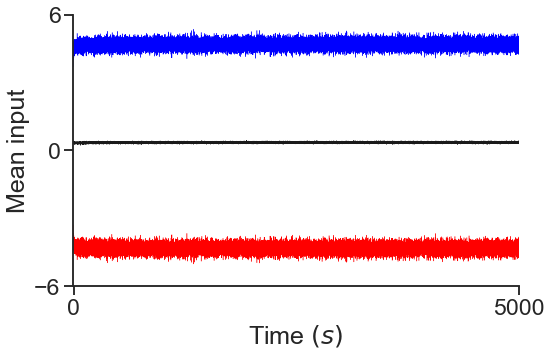

In [151]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":.43})

plt.plot(time_axis,Ie_current+Ix_current,color='blue')
plt.plot(time_axis,Ii_current,color='red')
plt.plot(time_axis,Ie_current+Ii_current+Ix_current,color='k')
    
plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Mean input')

plt.ylim((-6,6))
plt.xlim((0-5,T/1000+5))

plt.xticks((0,T/1000))
plt.yticks((-6,0,6))
sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/input_evolution_ee_softHebbian.pdf", bbox_inches="tight")


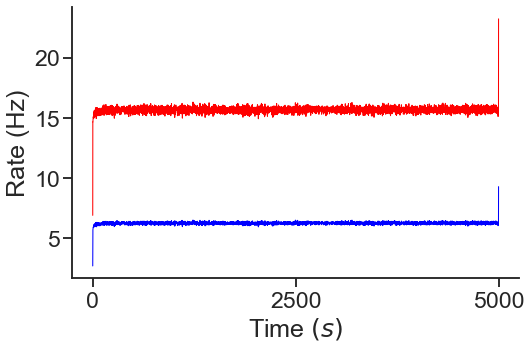

In [152]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":1.03})


plt.plot(1000*eRateT,color='blue')
plt.plot(1000*iRateT,color='red')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Rate (Hz)')

plt.xticks((0,T/1000/2,T/1000))

sns.despine()
plt.show()